In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Telecom_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,
TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn are the categorical columns 
in the dataset

SeniorCitizen,tenure,MonthlyCharges are the continuous columns in the dataset

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Seems there are no null values

Divinding categorical and continuous columns

In [8]:
cate_cols=df[['customerID','gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','TotalCharges','Churn']]
cont_cols=df[['SeniorCitizen','tenure','MonthlyCharges']]

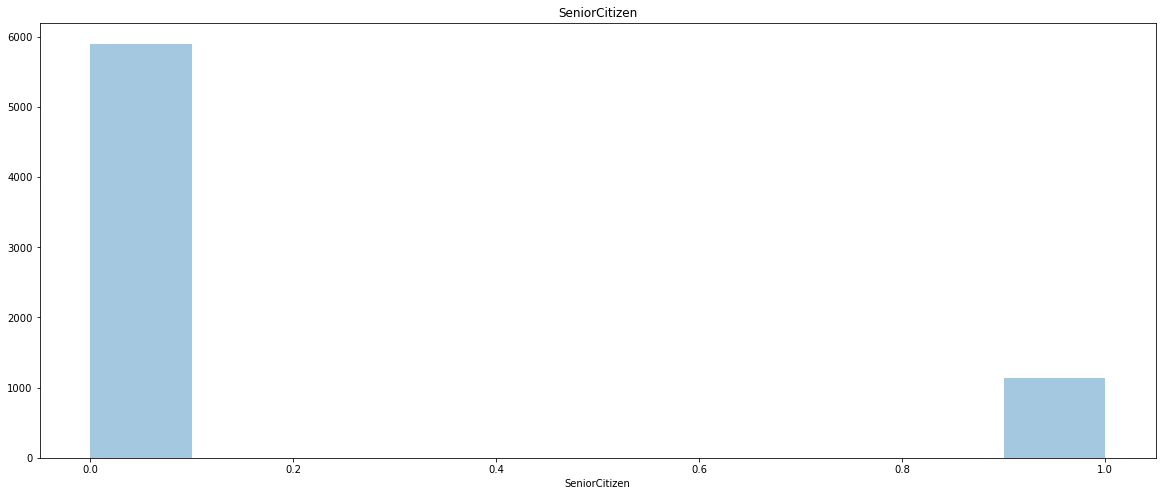

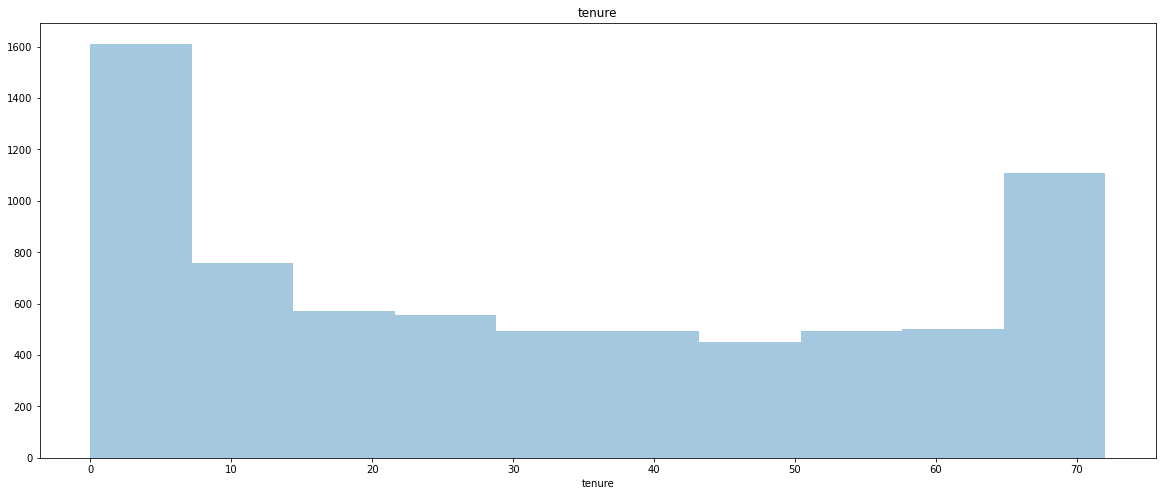

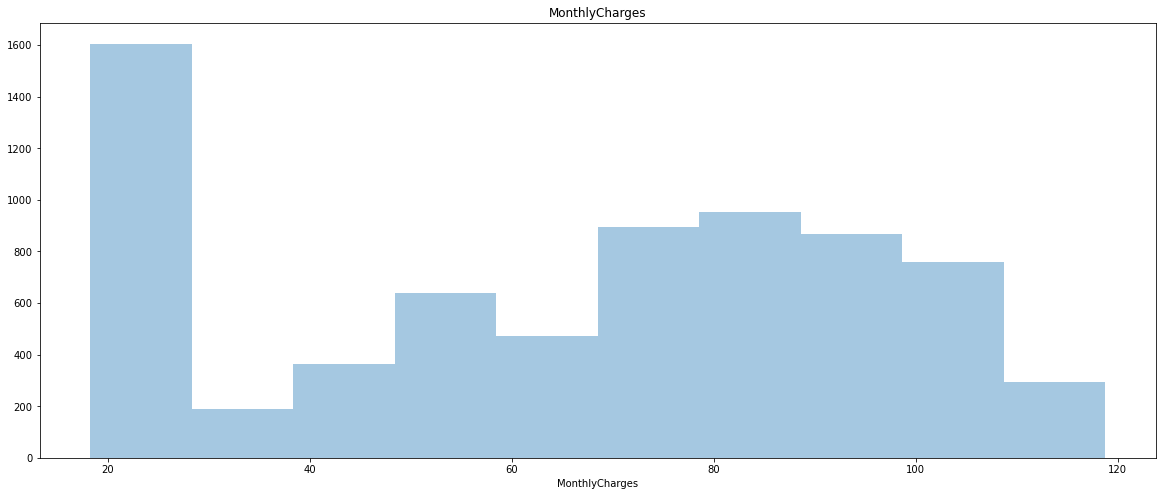

In [9]:
for i in cont_cols:                                
    plt.figure(figsize = (20, 8))
    sns.distplot(a= df[i], bins = 10, kde= False)
    plt.title(i)
    plt.show()

C:\Users\Gamya\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


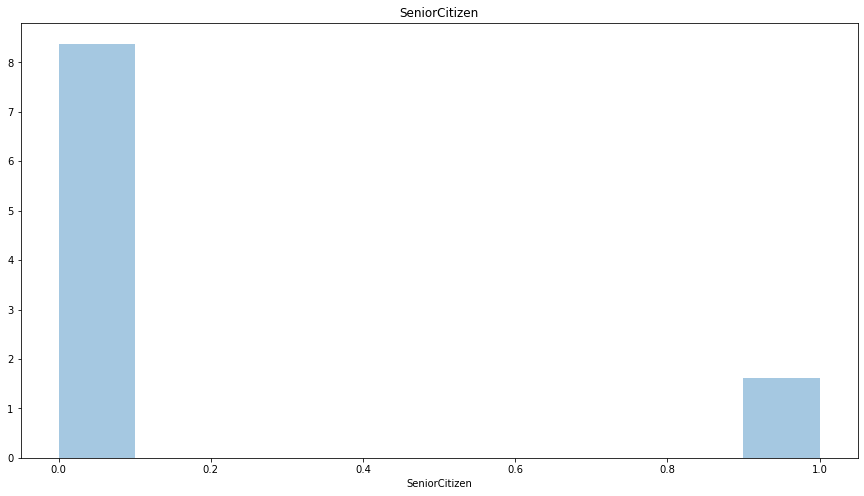

In [10]:
plt.figure(figsize = (15, 8))
sns.distplot(df['SeniorCitizen'], bins = 10)
plt.title('SeniorCitizen')
plt.show()

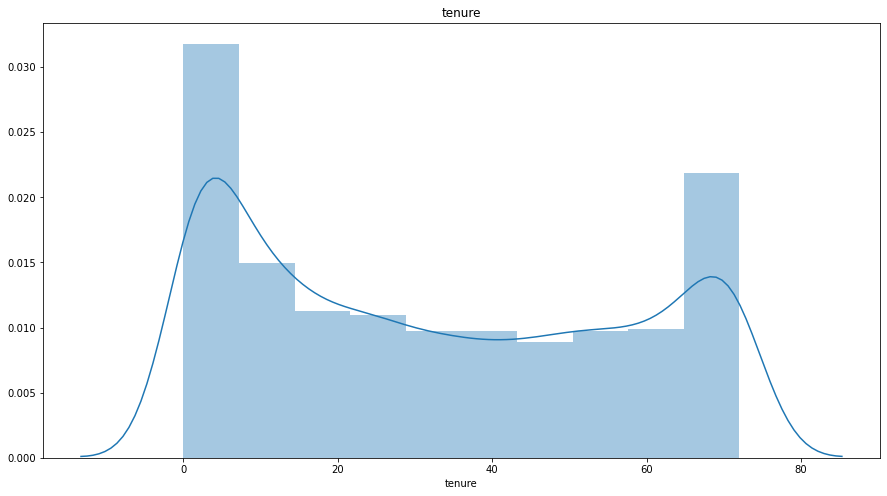

In [11]:
plt.figure(figsize = (15, 8))
sns.distplot(df['tenure'], bins = 10)
plt.title('tenure')
plt.show()

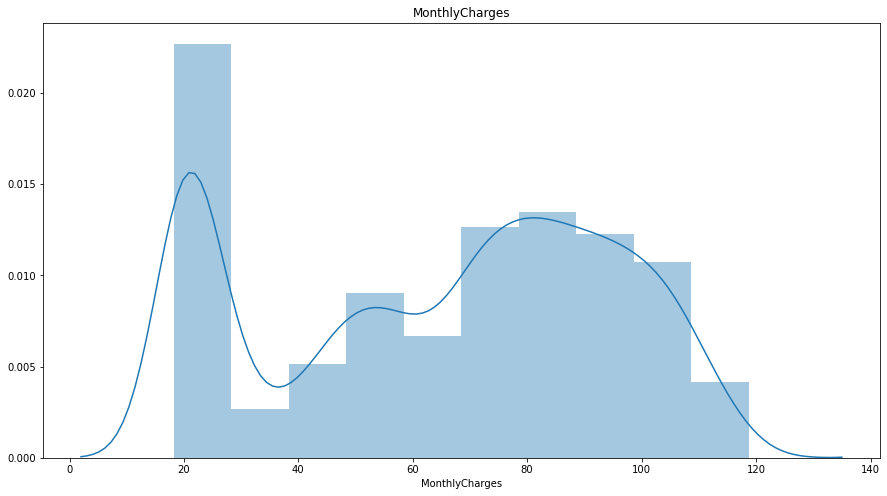

In [12]:
plt.figure(figsize = (15, 8))
sns.distplot(df['MonthlyCharges'], bins = 10)
plt.title('MonthlyCharges')
plt.show()

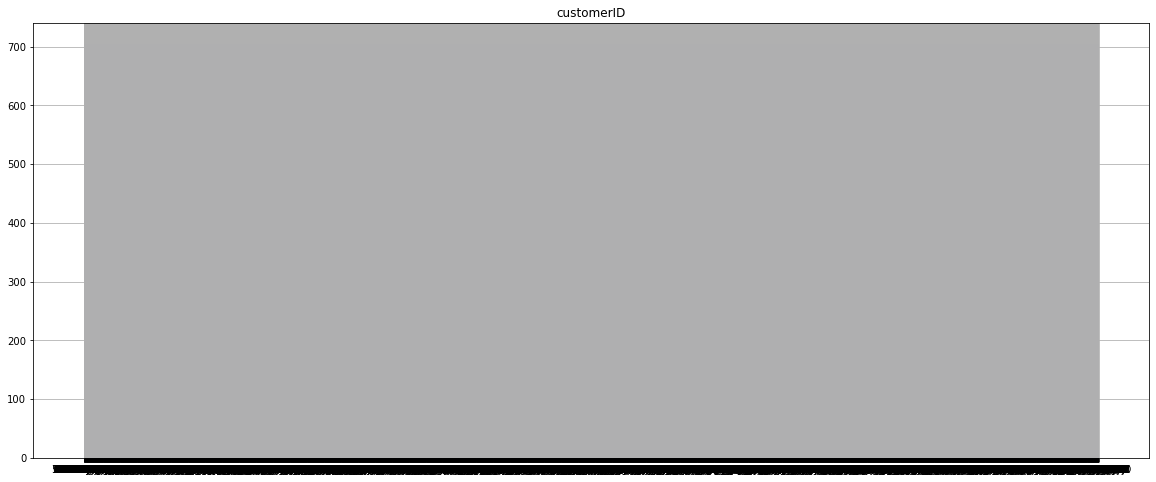

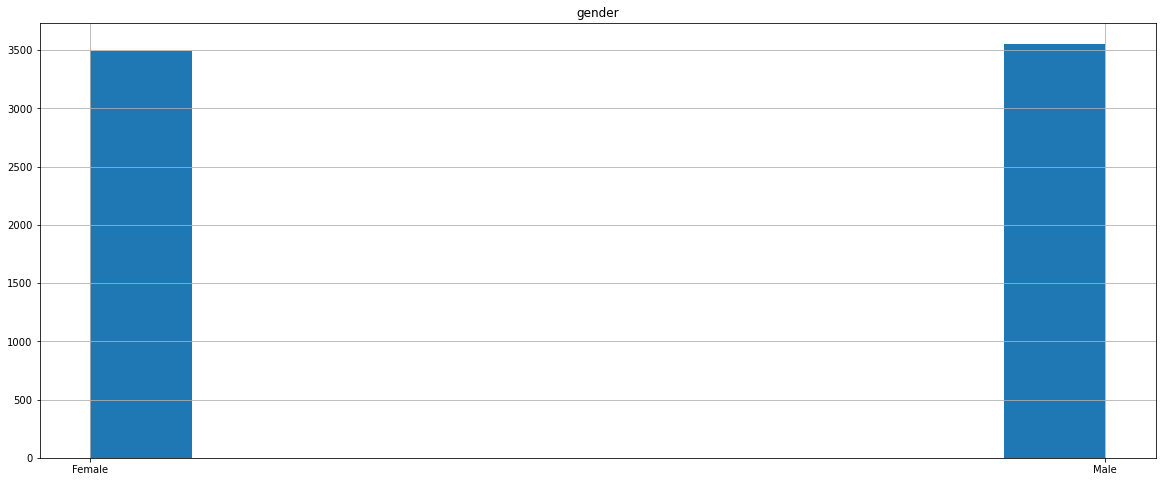

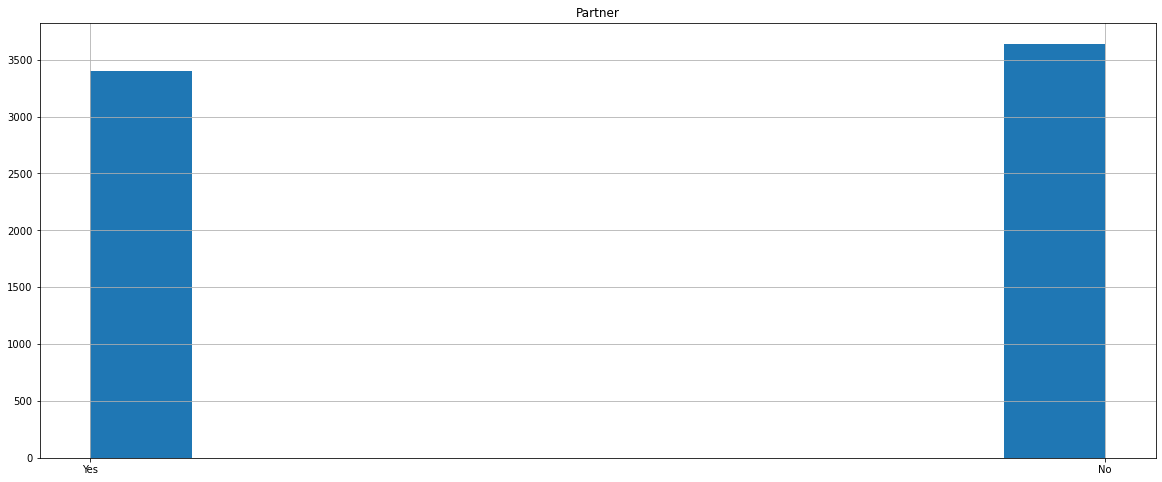

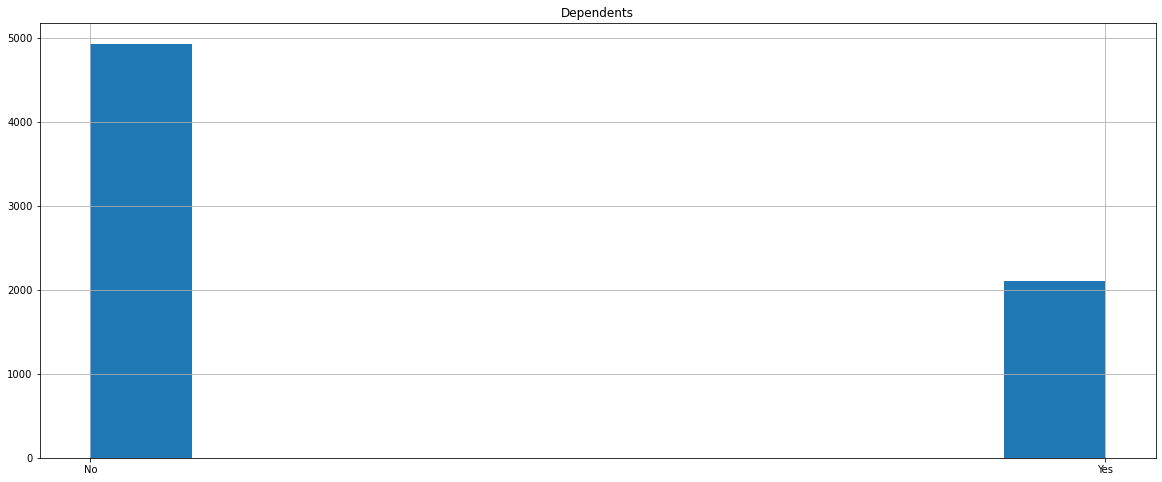

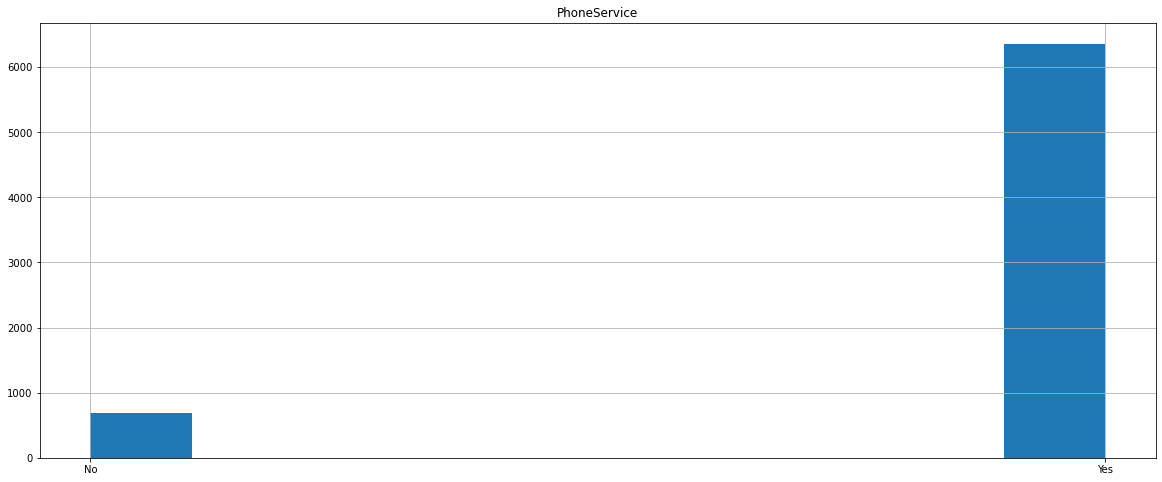

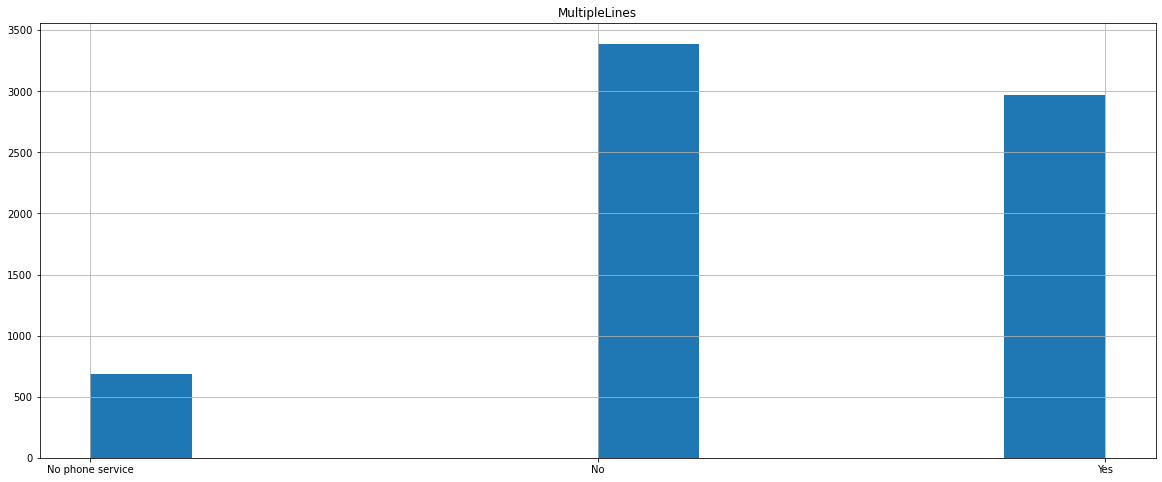

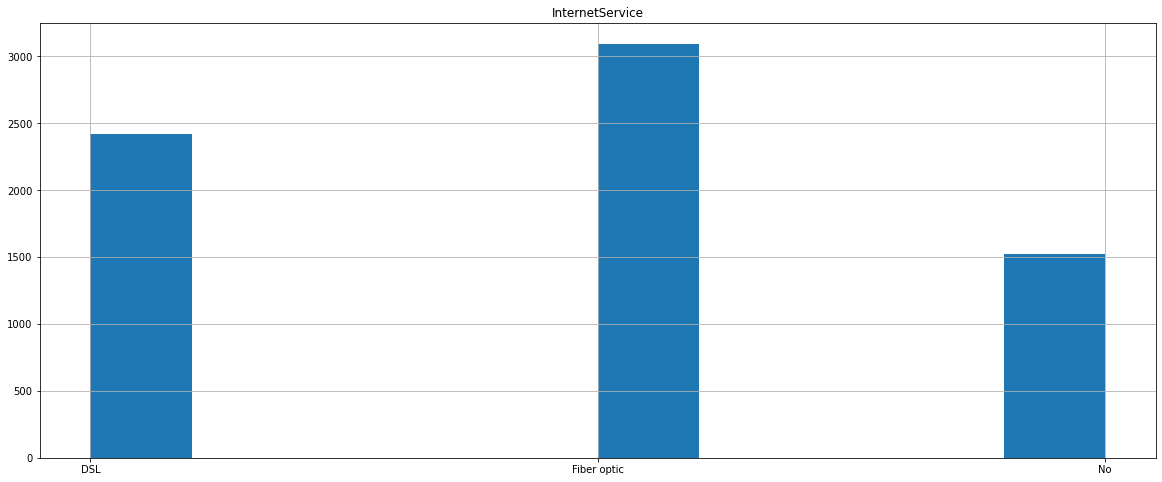

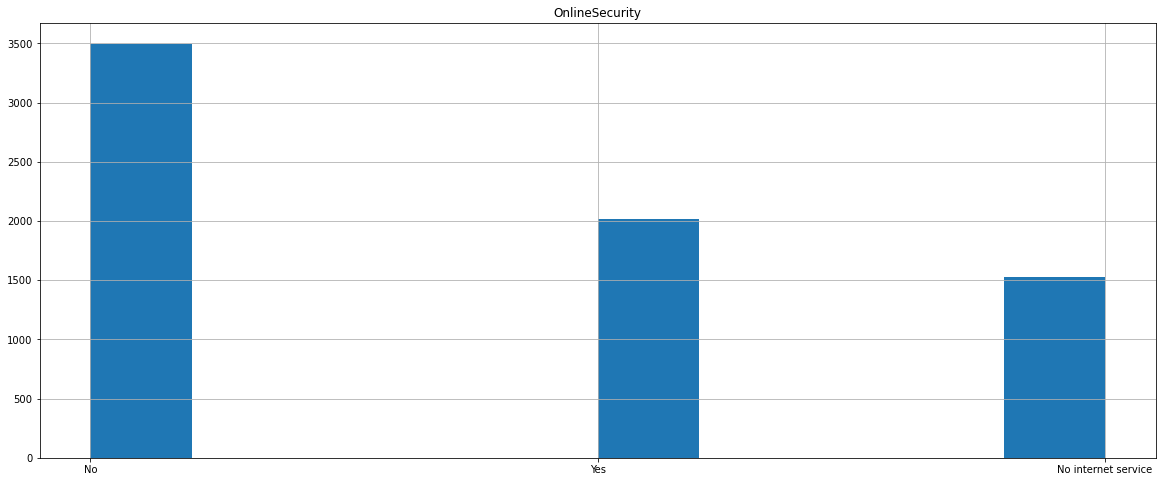

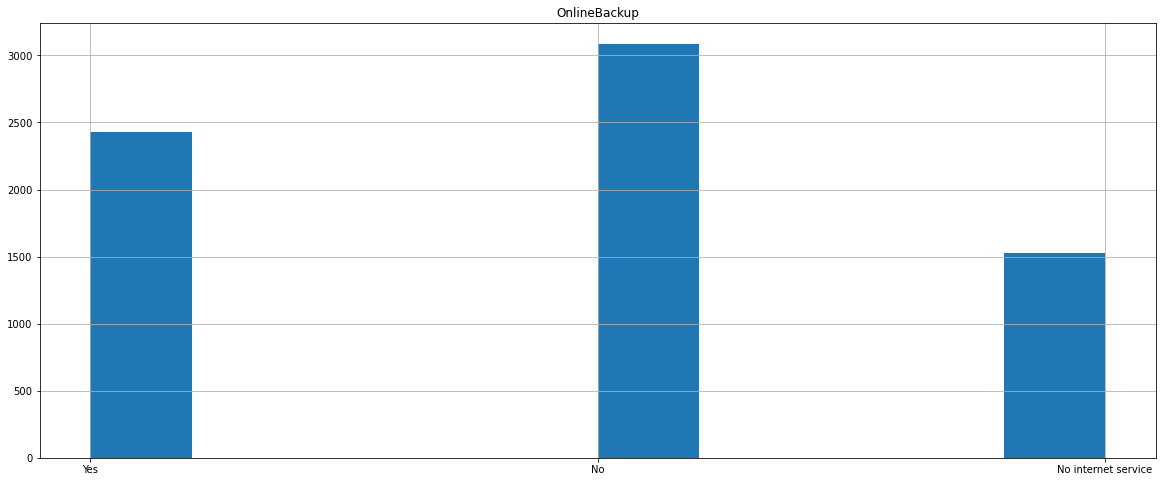

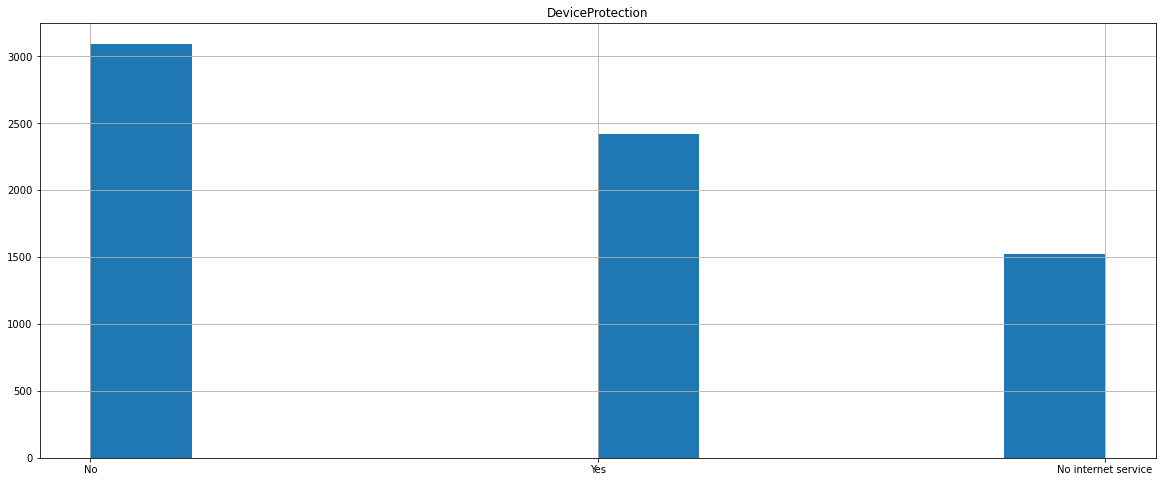

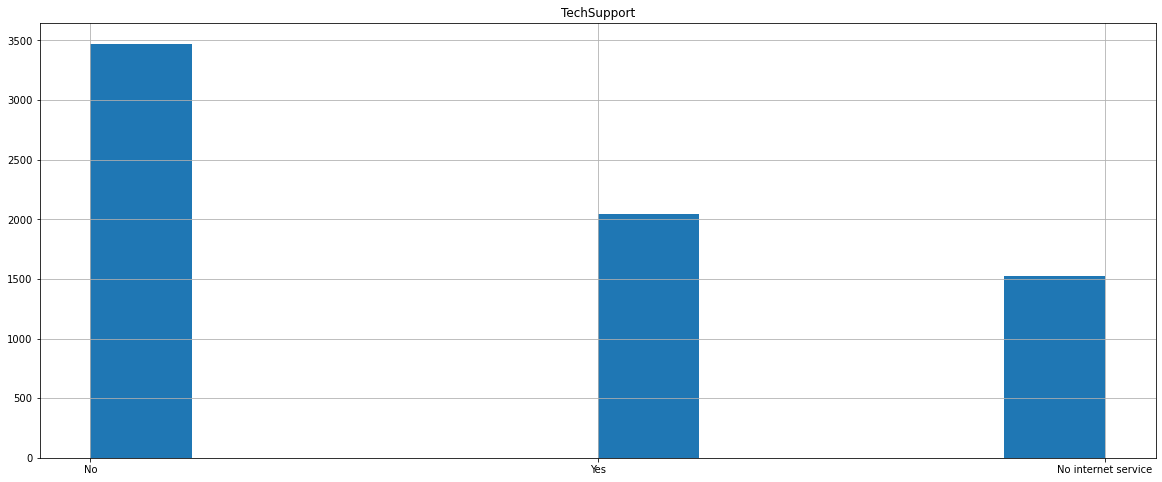

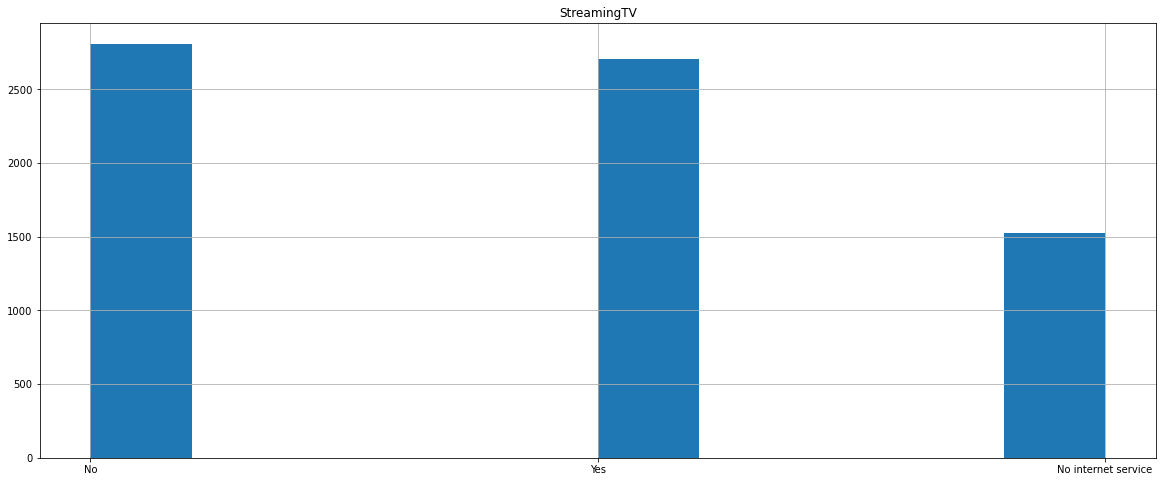

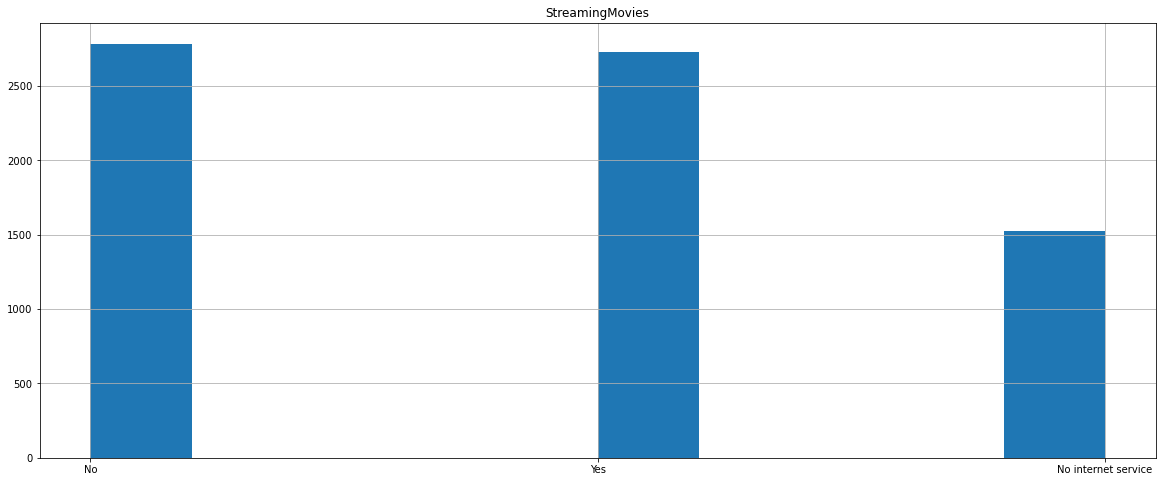

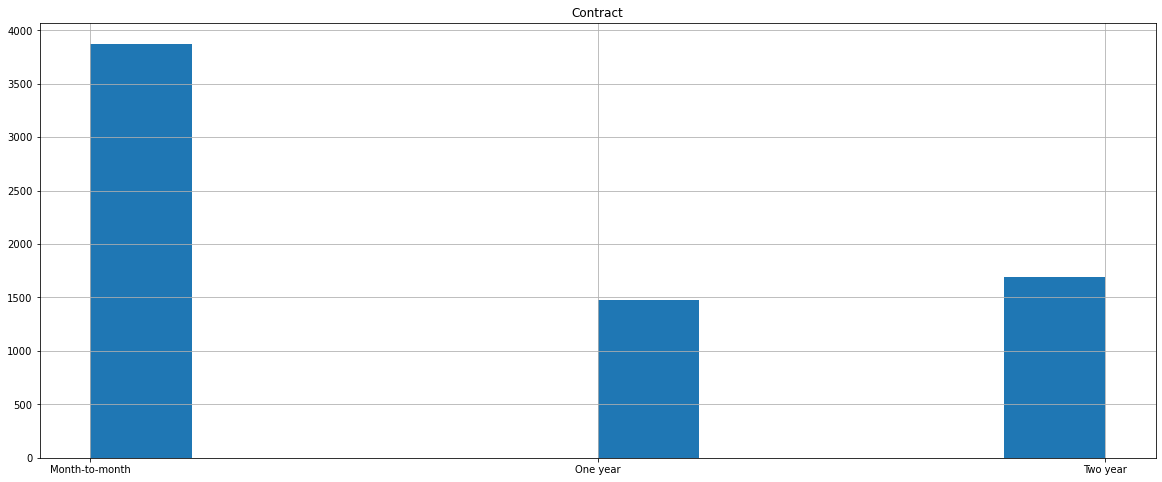

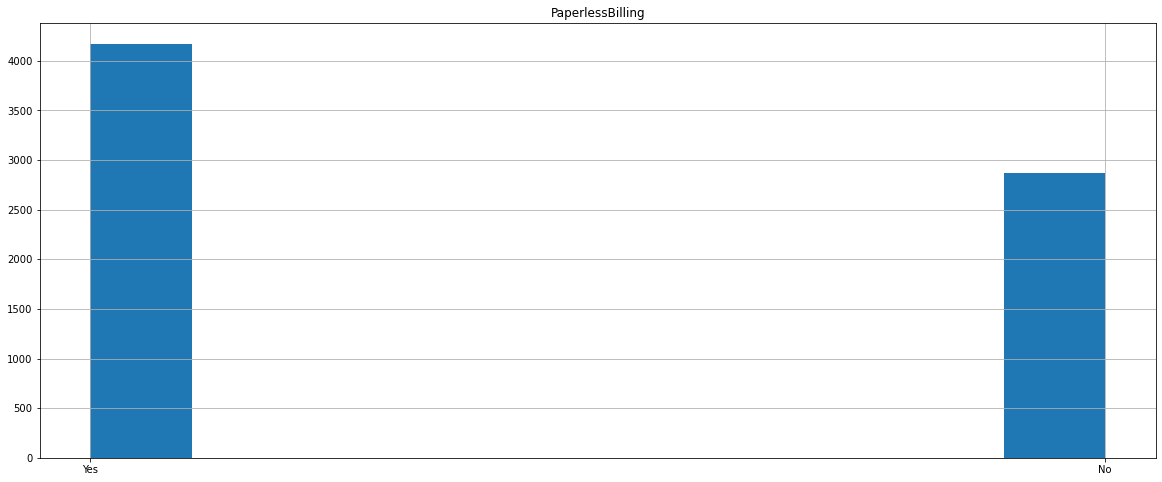

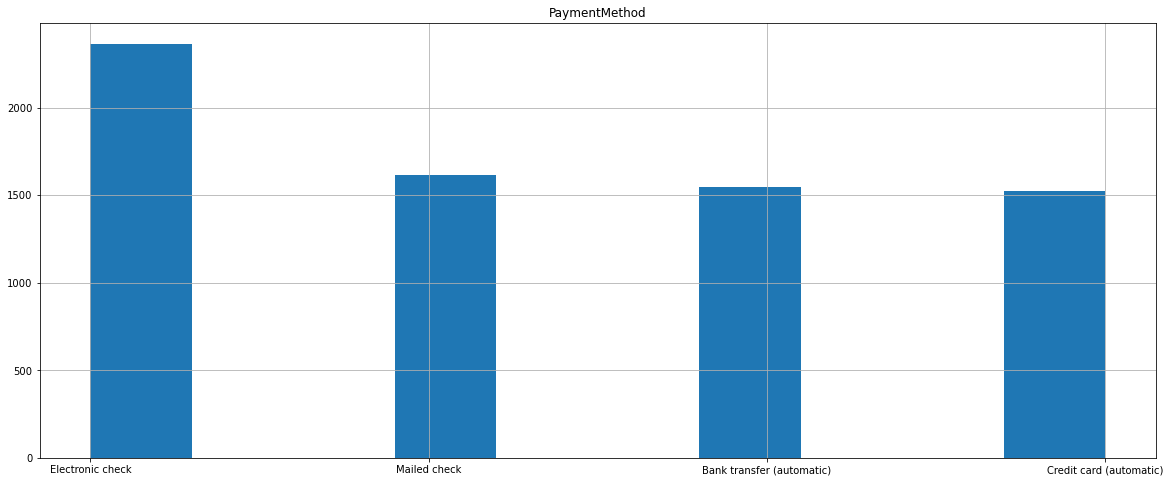

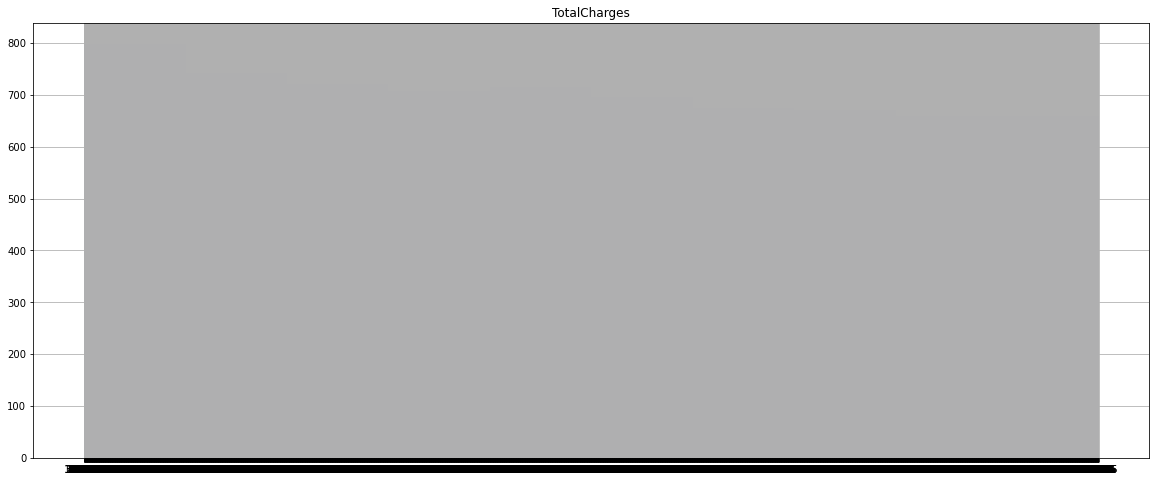

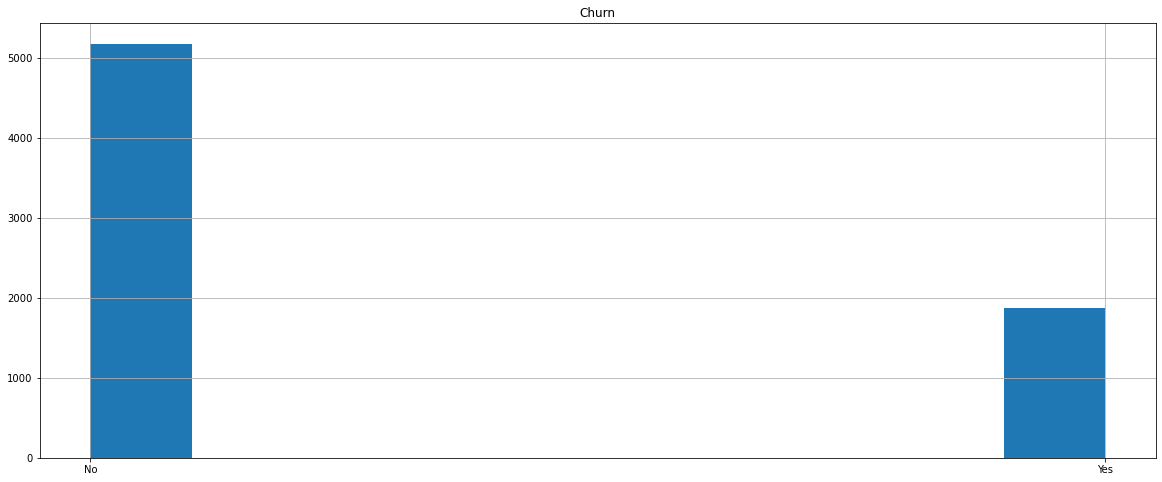

In [13]:
for i in cate_cols:                                 
    plt.figure(figsize = (20, 8))
    df[i].hist(grid = True)
    plt.title(i)
    plt.show()

In [14]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


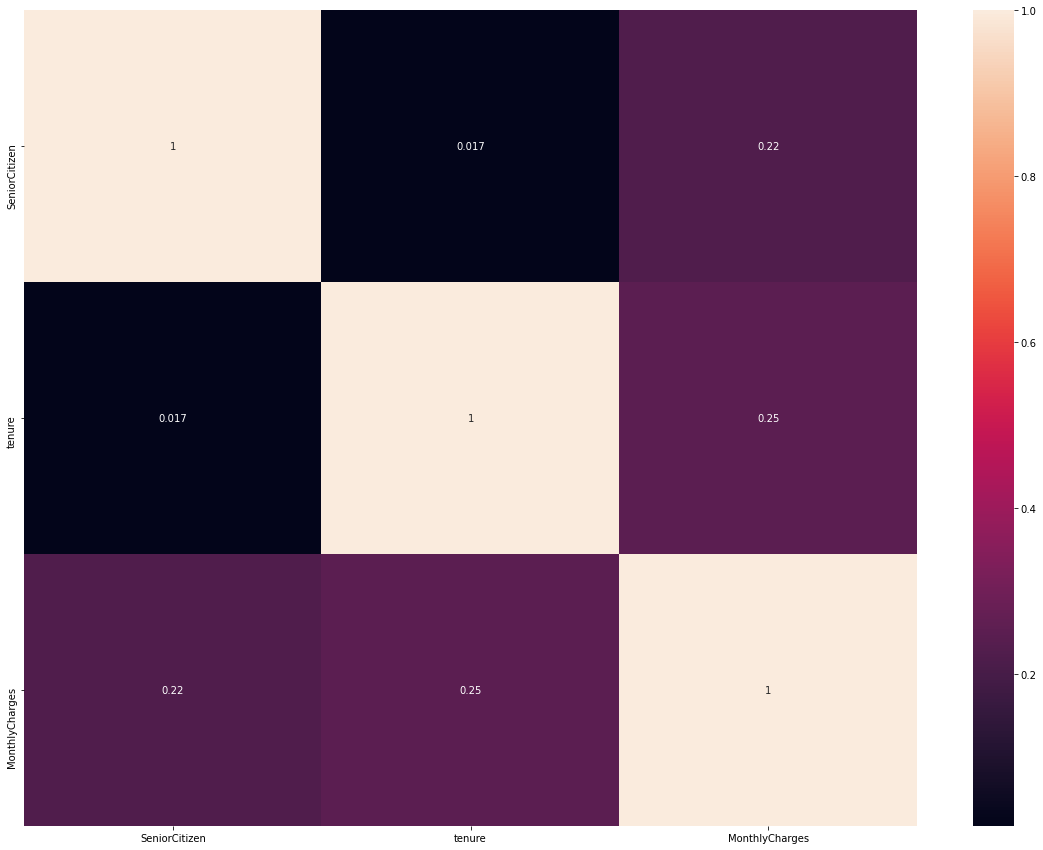

In [17]:
plt.figure(figsize = [20, 15])                             
sns.heatmap(df.corr(), annot = True)
plt.show()

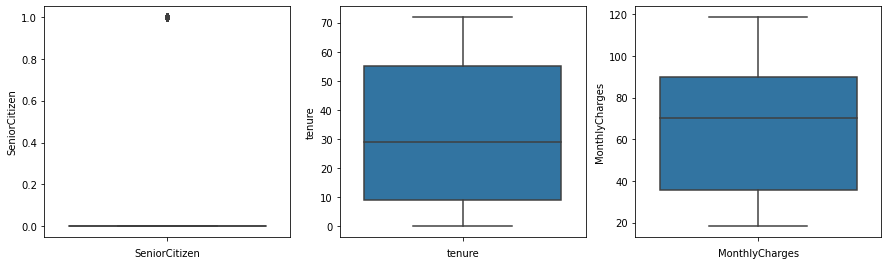

In [16]:
#Visualize the outliers using boxplot
import matplotlib.pyplot as plt
plt.figure(figsize=(15,50))
graph=1
for column in cont_cols:
    if graph<=30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(df[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

Seems there are not more outliers to deal with

In [18]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
dtype: float64

In [20]:
#making the skewness less than or equal to 0.5 for better prediction and to get normal distribution graph
df['SeniorCitizen']=np.log1p(df['SeniorCitizen'])

In [24]:
#LabelEncoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in df:
    df[col] = label_encoder.fit_transform(df[col])

In [25]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,142,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,498,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,436,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,266,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,729,925,1


In [26]:
x = df.drop('Churn', axis = 1)
y = df['Churn']

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Best Random State

In [32]:
maxAccu = 0
maxRS = 0
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB                     
from sklearn.tree import DecisionTreeClassifier                 
from sklearn.ensemble import RandomForestClassifier            
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score                    
from sklearn.metrics import roc_auc_score                      
from sklearn.metrics import confusion_matrix, classification_report     
from sklearn.model_selection import cross_val_score         
for i in range (1, 500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print ('Max Accuracy obtained is', maxAccu, 'on Random State', maxRS)

Max Accuracy obtained is 0.8187411263606247 on Random State 24


Creating Train Test Split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 24)

In [34]:
LR = LogisticRegression()
nb = GaussianNB()
DTC = DecisionTreeClassifier()
svc = SVC()
rf = RandomForestClassifier()
models = [LR, nb, DTC, svc, rf]
for i in models:
    print (i)
    i.fit(x_train, y_train)
    pred = i.predict(x_test)
    print (accuracy_score(y_test, pred))
    print (confusion_matrix(y_test, pred))
    print (classification_report(y_test, pred))

LogisticRegression()
0.8187411263606247
[[1429  156]
 [ 227  301]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1585
           1       0.66      0.57      0.61       528

    accuracy                           0.82      2113
   macro avg       0.76      0.74      0.75      2113
weighted avg       0.81      0.82      0.81      2113

GaussianNB()
0.7595835305253195
[[1214  371]
 [ 137  391]]
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1585
           1       0.51      0.74      0.61       528

    accuracy                           0.76      2113
   macro avg       0.71      0.75      0.72      2113
weighted avg       0.80      0.76      0.77      2113

DecisionTreeClassifier()
0.7401798390913393
[[1284  301]
 [ 248  280]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1585
           1       0.48      0.53      0

In [35]:
for i in models:
    cvs = cross_val_score(i, x, y, cv = 5)
    print ('Cross Validation Score for ',i, ' model is :', cvs.mean())
    print (' ')

Cross Validation Score for  LogisticRegression()  model is : 0.7989496298148268
 
Cross Validation Score for  GaussianNB()  model is : 0.7563539381573005
 
Cross Validation Score for  DecisionTreeClassifier()  model is : 0.7251160357119814
 
Cross Validation Score for  SVC()  model is : 0.7346301575908123
 
Cross Validation Score for  RandomForestClassifier()  model is : 0.7948330335828118
 


LogisticRegression have very low difference between accuracy score and cross val score, hence we will consider LogisticRegression as the best model.

Hypertuning

In [36]:
from sklearn.model_selection import GridSearchCV

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model, decomposition, datasets
std_slc = StandardScaler()
pca = decomposition.PCA()
pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('logistic_Reg', LR)])

In [44]:
n_components = list(range(1,x.shape[1]+1,1))

In [45]:
C = np.logspace(-4, 4, 50)
penalty = ['l1', 'l2']

In [46]:
parameters = dict(pca__n_components=n_components,
                      logistic_Reg__C=C,
                      logistic_Reg__penalty=penalty)

In [47]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(x, y)

GridSearchCV(estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic_Reg', LogisticRegression())]),
             param_grid={'logistic_Reg__C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e...
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'logistic_Reg__penalty': ['l1', 'l2'],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               1

In [48]:
print('Best Penalty:', clf_GS.best_estimator_.get_params()['logistic_Reg__penalty'])
print('Best C:', clf_GS.best_estimator_.get_params()['logistic_Reg__C'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['logistic_Reg'])

Best Penalty: l2
Best C: 0.019306977288832496
Best Number Of Components: 20

LogisticRegression(C=0.019306977288832496)


In [50]:
LogisticRegression(C=0.019306977288832496, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=24,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(C=0.019306977288832496, multi_class='warn', random_state=24,
                   solver='warn')

In [56]:
lc1=LogisticRegression(random_state=24, C=0.019306977288832496, penalty='l2')
lc1.fit(x_train, y_train)
predlc1 = lc1.predict(x_test)
print (accuracy_score(y_test, predlc1))
print (confusion_matrix(y_test, predlc1))
print (classification_report(y_test, predlc1))

0.8144817794604827
[[1425  160]
 [ 232  296]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1585
           1       0.65      0.56      0.60       528

    accuracy                           0.81      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.81      0.81      0.81      2113



In [57]:
cvs = cross_val_score(lc1, x, y, cv = 5)
print ('Cross Validation Score for ',lc1, ' model is :', cvs.mean())

Cross Validation Score for  LogisticRegression(C=0.019306977288832496, random_state=24)  model is : 0.798948924124137


In [58]:
import pickle
pickle.dump(lc1, open('customer_churn', 'wb'))

In [59]:
# Loading model to compare the results
loaded = pickle.load(open('customer_churn','rb'))

In [60]:
predlc1 = lc1.predict(x_test)
predlc1

array([1, 0, 1, ..., 0, 1, 0])